<a href="https://colab.research.google.com/github/polock11/Data-Visualization-with-Python/blob/main/Data_Visualization_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topics

*   Bar Plot
*   Pie Plot

**Dataset Used**

*   bmw.csv





In [ ]:
#For data analysis
import numpy as np
import pandas as pd

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

**Read the csv file as a pandas DataFrame**

In [ ]:
#importing the dataset

df = pd.read_csv("bmw.csv")
df.head()

#if the file is in ".xlsx" formet
#df = pd.read_excel("bmw.xlsx")


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,50.4,3.0


**Checking the missing values**

In [ ]:
df.info()

#NaN - Not a Number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   mpg           10781 non-null  float64
 7   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 673.9+ KB


**Count Unique Values** 

In [ ]:
df['year'].unique() # returns a np_list of unique values

len(df['year'].unique()) #count the number of unique values

df['year'].value_counts() # count each unique occurance

2019    3485
2016    1882
2017    1721
2015     922
2018     848
2020     733
2014     501
2013     357
2012     119
2011      51
2010      41
2009      30
2008      23
2007      16
2006      14
2004      12
2002       6
2005       6
1999       4
2001       3
2003       2
2000       2
1996       1
1997       1
1998       1
Name: year, dtype: int64

In [ ]:
df['transmission'].unique()
df['transmission'].value_counts()

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

**Pie Chart**

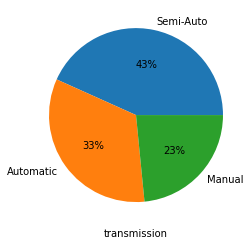

In [ ]:
df['transmission'].value_counts().plot(kind = 'pie', autopct = '%1.0f%%')

plt.xlabel('transmission')
plt.ylabel('')
plt.show()

**Notes**


*   For visuals use SEABORN
*   To edit the x/ylabel, x/yticks, adding legends use MATPLOTLIB



#Further Practice

**Counting Percentage**

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,50.4,3.0


In [ ]:
df_fuelType = pd.DataFrame(df['fuelType'].value_counts()) #value_counts() returnes a pandas series, so converting the series into a pd.dataframe to maniupulate more

df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns = {'index': 'fuelType',
                                 'fuelType': 'no_of_cars'})

#calculating the percentage of cars in each fuel type
df_fuelType['% of cars'] = (df_fuelType['no_of_cars']/df.shape[0])*100
df_fuelType = df_fuelType.round(2) 

df_fuelType.head()

,fuelType,no_of_cars,% of cars
0,Diesel,7027,65.18
1,Petrol,3417,31.69
2,Hybrid,298,2.76
3,Other,36,0.33
4,Electric,3,0.03


In [ ]:
df_model = pd.DataFrame(df['model'].value_counts())
df_model = df_model.reset_index()
df_model = df_model.rename(columns = {'index':'model',
                           'model':'no_of_cars'})

df_model['%_of_cars'] = (df_model['no_of_cars']/df.shape[0])*100
df_model = df_model.round(2)

df_model.head()

,model,no_of_cars,%_of_cars
0,3 Series,2443,22.66
1,1 Series,1969,18.26
2,2 Series,1229,11.40
3,5 Series,1056,9.80
4,4 Series,995,9.23


**Creating Barplot for 'fuelType'**

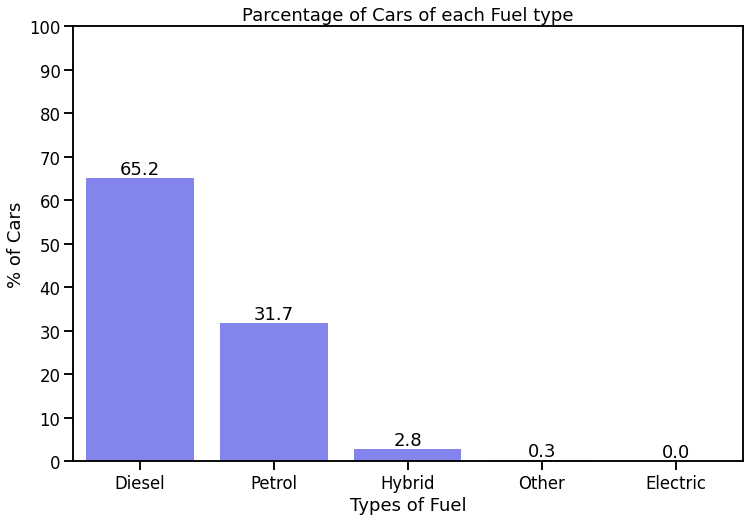

In [ ]:
sns.set_context('talk')
plt.figure(figsize=(12,8))
splot = sns.barplot(x = 'fuelType', y = "% of cars",data = df_fuelType, color = 'blue',alpha = .55)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel('Types of Fuel')
plt.ylabel("% of Cars")
plt.title("Parcentage of Cars of each Fuel type")
plt.yticks(np.arange(0,101,10))

plt.show()

**Creating Barplot for "model"**

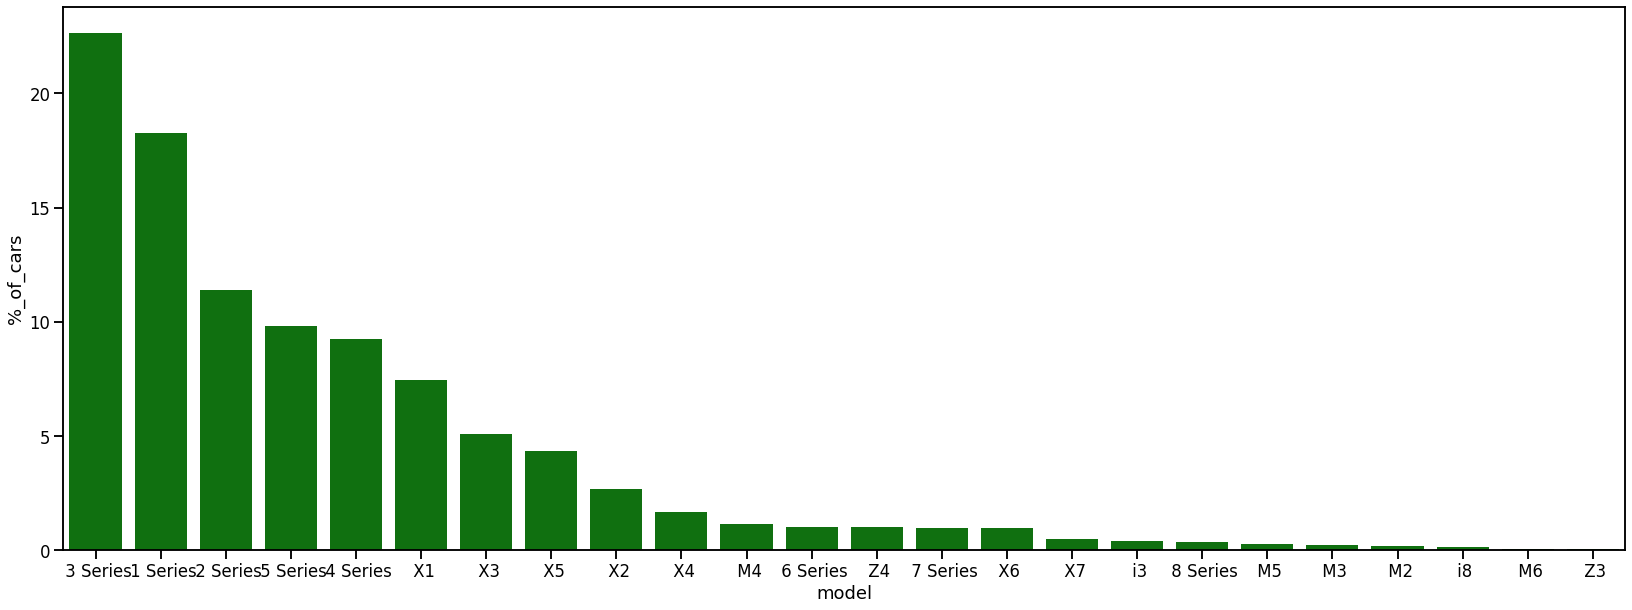

In [ ]:
plt.figure(figsize = (28,10))
sns.barplot(x = 'model', y = "%_of_cars", data = df_model, color='green')
plt.show()

**Further Practice**

In [ ]:
data = df
data.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,50.4,3.0


In [ ]:
data_trans = pd.DataFrame(data['transmission'].value_counts())
data_trans = data_trans.reset_index()
data_trans = data_trans.rename(columns = {'index':'transmission',
                                              'transmission': 'count_of_cars'})
data_trans.head()
data_trans['%_of_cars'] = (data_trans['count_of_cars']/data.shape[0])*100
data_trans = data_trans.round(2)
data_trans.head()  


,transmission,count_of_cars,%_of_cars
0,Semi-Auto,4666,43.28
1,Automatic,3588,33.28
2,Manual,2527,23.44


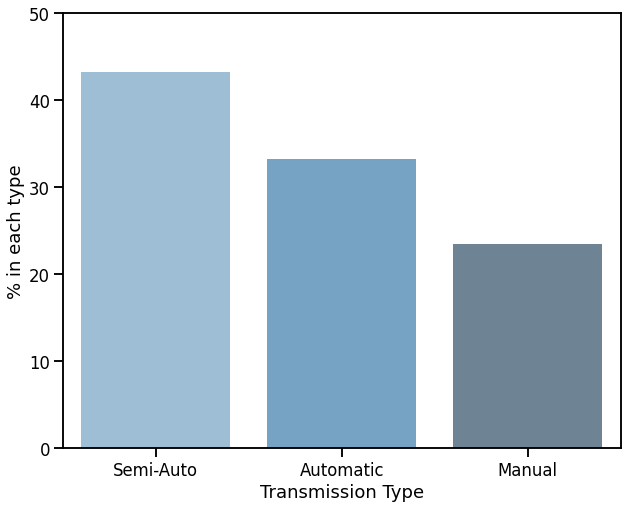

In [ ]:
sns.barplot(x = 'transmission', y='%_of_cars', data = data_trans, color = 'green', alpha = .75, palette="Blues_d")
plt.xlabel('Transmission Type')
plt.ylabel('% in each type')
plt.yticks(np.arange(0,51,10))
plt.gcf().set_size_inches(10, 8)
plt.show()


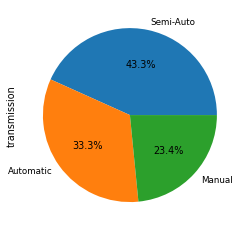

In [ ]:
sns.set_context('paper')
data['transmission'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

plt.show()

**Analysis for the Ford Dataset**

In [ ]:
df = pd.read_csv('ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


In [ ]:
df.describe()

,year,price,mileage,mpg,engineSize
count,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2016.864173,12280.078435,23361.880149,57.907832,1.350824
std,2.024987,4741.318119,19471.243292,10.125632,0.432383
min,1996.000000,495.000000,1.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,58.900000,1.200000
75%,2018.000000,15299.000000,31052.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,201.800000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [ ]:
df_year = pd.DataFrame(df['year'].value_counts())
df_year = df_year.reset_index()
df_year = df_year.rename(columns = {'index':'year',
                                    'year':'count_in_year'})
df_year['%_in_year'] = (df_year['count_in_year']/df.shape[0])*100
df_year = df_year.round(2)

df_year.head()

,year,count_in_year,%_in_year
0,2017,4888,27.21
1,2018,4014,22.34
2,2019,3194,17.78
3,2016,2331,12.98
4,2015,1367,7.61


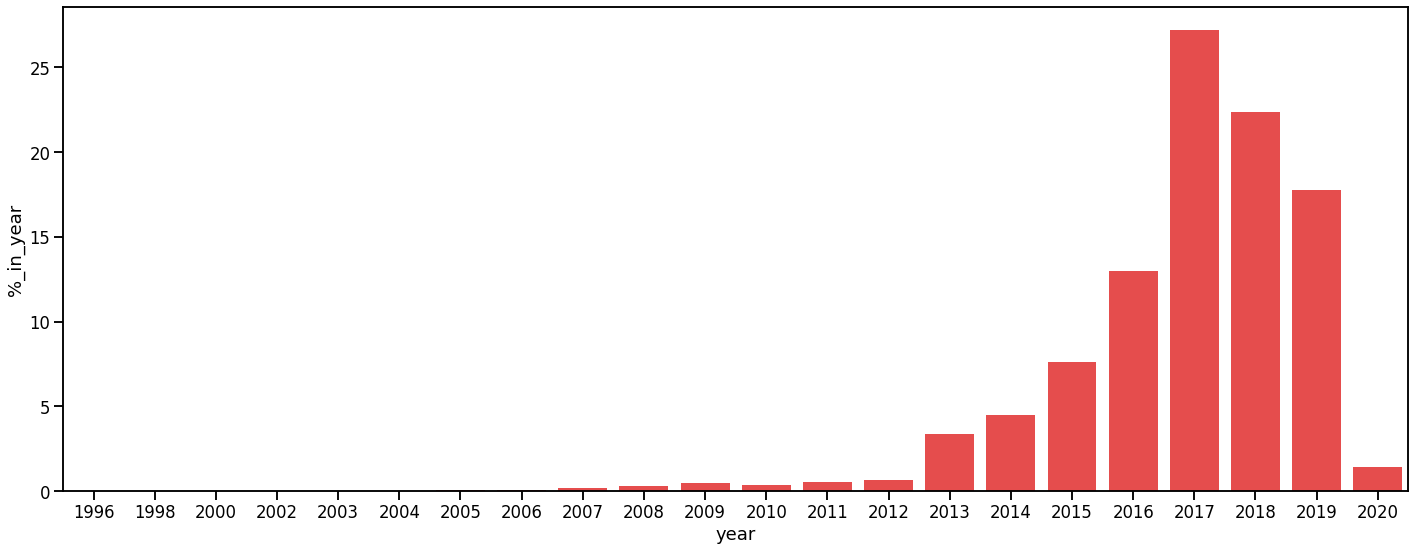

In [ ]:
sns.set_context('talk')
plt.figure(figsize = (20,8))
sns.barplot(x = "year", y = '%_in_year', data = df_year, color='red', alpha = .80)
plt.tight_layout()
plt.show()

**Taking a portion of year and plotting them**

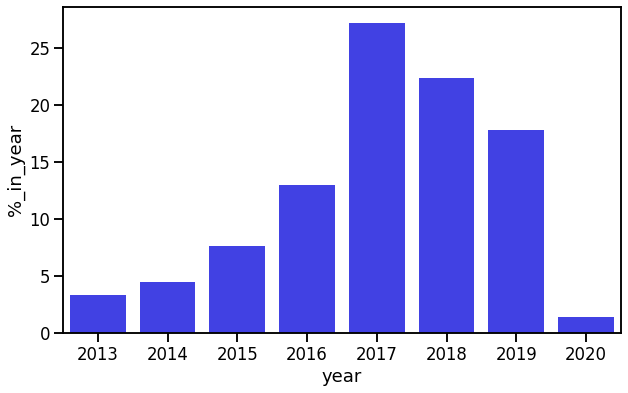

In [ ]:
sns.set_context('talk')
plt.figure(figsize = (10,6))

#taking year 2013 and afterwards
after_2013 = df_year[df_year['year'] >= 2013]
after_2013.head()

#plotting from 2013 to 2020
sns.barplot(x='year',y='%_in_year', data = after_2013, color = 'blue', alpha = .85)
plt.show()

**Adding from 2012 to rest of the years and appending the as OTHER in the same plot**

In [ ]:
#takeing from 2012 to rest 
before_2013 = df_year[df_year['year'] < 2013]
before_2013.head()

#calculating the percentage of other years
total_other = sum(before_2013['count_in_year'])
per_of_other = (total_other/df.shape[0])*100

#adding other row on the after_2013 dataframe
df2 = {'year': 'Other', 'count_in_year': 498, '%_in_year': 2.78}
after_2013 = after_2013.append(df2, ignore_index = True)

after_2013.tail()

,year,count_in_year,%_in_year
5,2014,805,4.48
6,2013,609,3.39
7,2020,258,1.44
8,Other,498,2.78
9,Other,498,2.78


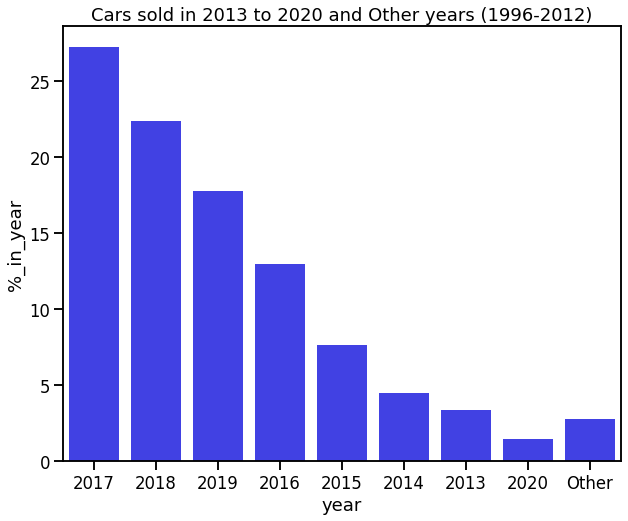

In [ ]:
#plotting from 2020 to 2013 and Other years
sns.set_context('talk')
plt.figure(figsize=(10,8))
sns.barplot(x='year',y='%_in_year', data = after_2013, color = 'blue', alpha = .85)

#addibg annotation 
'''
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
'''
plt.title('Cars sold in 2013 to 2020 and Other years (1996-2012)')
plt.show()

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


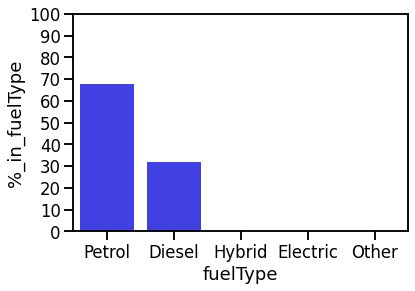

In [ ]:
df_fuelType = pd.DataFrame(df['fuelType'].value_counts())
df_fuelType = df_fuelType.reset_index()

df_fuelType = df_fuelType.rename(columns = {'index':'fuelType',
                                            'fuelType':'count_in_fuelType'})

df_fuelType['%_in_fuelType'] = (df_fuelType['count_in_fuelType']/df.shape[0])*100
df_fuelType.round(2)

sns.barplot(x = 'fuelType', y = '%_in_fuelType', data = df_fuelType, color = 'blue', alpha = .85)
plt.yticks(np.arange(0,101,10))
plt.show()

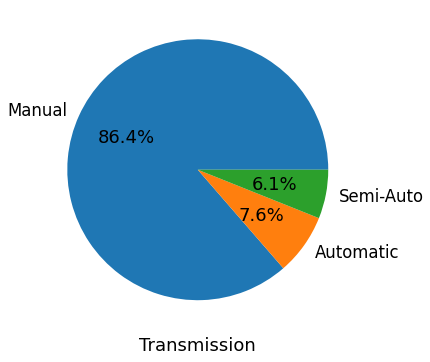

In [ ]:
plt.figure(figsize = (6,6))
df['transmission'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.xlabel('Transmission')
plt.ylabel("")
plt.show()